In [1]:
import cv2 as cv
import pickle
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
import seaborn as sn
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
d = unpickle('../data/data_batch_1')

In [4]:
pic = d[b'data'][1].reshape(3, 32, 32).transpose(1, 2, 0)

True

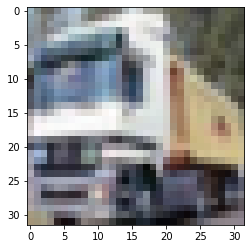

In [5]:
cv.imwrite('../data/HW1/problem4_results/origin.jpg', cv.cvtColor(pic, cv.COLOR_RGB2BGR))
plt.imshow(pic)
plt.show()

True

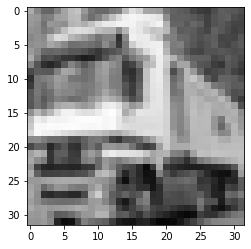

In [6]:
gray = cv.cvtColor(pic, cv.COLOR_RGB2GRAY)
cv.imwrite('../data/HW1/problem4_results/gray.jpg', gray)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [7]:
def get_2D_Gaussian_kernel(size, muu, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, size[0]), np.linspace(-1, 1, size[1]))
    dst = np.sqrt(x * x + y * y)
    gauss = np.exp(-((dst-muu) ** 2 / (2.0 * sigma ** 2)))
    gauss = gauss / gauss.sum()
    return gauss

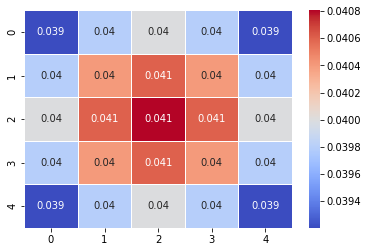

In [8]:
GKernel = get_2D_Gaussian_kernel((5, 5), 0, 5)
svm = sn.heatmap(GKernel, annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
figure = svm.get_figure()    
figure.savefig('../data/HW1/problem4_results/GKernel.png', dpi=400)

True

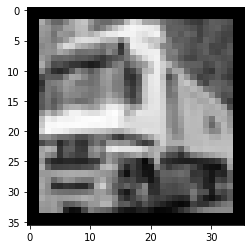

In [9]:
padded_pic = np.pad(gray, 2, constant_values=(0))
plt.imshow(padded_pic, cmap='gray', vmin=0, vmax=255)
cv.imwrite('../data/HW1/problem4_results/padded.jpg', padded_pic)
plt.show()

True

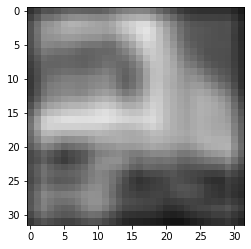

In [10]:
new_plot = np.zeros((32, 32))
for i in range(32):
    for j in range(32):
        new_plot[i][j] = (padded_pic[i: i + 5, j: j + 5] * GKernel).sum()
cv.imwrite('../data/HW1/problem4_results/correlation.jpg', new_plot)
plt.imshow(new_plot, cmap='gray', vmin=0, vmax=255)
plt.show()

True

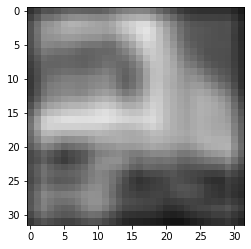

In [11]:
new_plot2 = np.zeros((32, 32))
GKernel2 = np.transpose(GKernel)
for i in range(32):
    for j in range(32):
        new_plot2[i][j] = (padded_pic[i: i + 5, j: j + 5] * GKernel2).sum()
cv.imwrite('../data/HW1/problem4_results/covolution.jpg', new_plot2)
plt.imshow(new_plot, cmap='gray', vmin=0, vmax=255)
plt.show()